# Predicting used car prices

In this notebook, I'll work with the [Kaggle](https://www.kaggle.com/avikasliwal/used-cars-price-prediction) dataset about used cars and their prices. The notebook first includes exploration of the dataset followed by prediction of prices.

## Import libraries

I'll import `datetime` to handle year, `numpy` to work with arrays and `pandas` to read in the dataset files, `matplotlib` & `seaborn` for plotting and `sklearn` for various machine learning models.

In [1]:
import datetime

import numpy as np
import pandas as pd
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pickle

## Read dataset

I'll read the dataset and get information about it.

In [2]:
dataset = pd.read_csv("data/dataset.csv")
dataset.head(5)
#dataset.shape
#dataset[]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
#dataset.iloc[4201:4202]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


Let's first split the dataset into train and test datasets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [5]:
#X_train.shape

## Exploratory Data Analysis

Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

### Index

The first column is the index for each data point and hence we can simply remove it.

In [6]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

print(X_train)

                                              Name   Location  Year  \
4201         Volkswagen Polo Diesel Trendline 1.2L     Jaipur  2011   
4383                            Hyundai i10 Sportz  Hyderabad  2016   
1779                        Mahindra XUV500 W8 2WD      Kochi  2014   
4020                         Maruti Swift VDI BSIV    Kolkata  2013   
3248         Volkswagen Polo Petrol Trendline 1.2L      Kochi  2011   
...                                            ...        ...   ...   
3772  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5191            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5226                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5390                         Honda Amaze S i-Dtech     Jaipur  2014   
860    Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
4201              77000    Diesel       Manual      First  22.07 kmpl   
4

In [7]:
#X_train["Manufacturer"] = make_train[0]
#X_test["Manufacturer"] = make_test[0] 
print(X_train) 

                                              Name   Location  Year  \
4201         Volkswagen Polo Diesel Trendline 1.2L     Jaipur  2011   
4383                            Hyundai i10 Sportz  Hyderabad  2016   
1779                        Mahindra XUV500 W8 2WD      Kochi  2014   
4020                         Maruti Swift VDI BSIV    Kolkata  2013   
3248         Volkswagen Polo Petrol Trendline 1.2L      Kochi  2011   
...                                            ...        ...   ...   
3772  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5191            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5226                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5390                         Honda Amaze S i-Dtech     Jaipur  2014   
860    Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
4201              77000    Diesel       Manual      First  22.07 kmpl   
4

Let's also confirm that there are no null values and identify all unique values.

Maximum cars in the dataset are by the manufacturer **Maruti** and there are no null values.

I'll also drop the `Name` column.

In [8]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)
print(X_train)

       Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
4201     Jaipur  2011              77000    Diesel       Manual      First   
4383  Hyderabad  2016              19947    Petrol       Manual      First   
1779      Kochi  2014              70963    Diesel       Manual      First   
4020    Kolkata  2013             115195    Diesel       Manual      First   
3248      Kochi  2011              58752    Petrol       Manual      First   
...         ...   ...                ...       ...          ...        ...   
3772    Chennai  2015              27000    Petrol    Automatic      First   
5191    Chennai  2019               9000    Diesel    Automatic      First   
5226  Hyderabad  2013             140000    Diesel       Manual     Second   
5390     Jaipur  2014              76414    Diesel       Manual      First   
860     Kolkata  2011              98000    Diesel       Manual     Second   

         Mileage   Engine     Power  Seats New_Price  
4201  22

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [9]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

X_train.drop("Fuel_Type",axis = 1, inplace = True)
X_test.drop("Fuel_Type", axis = 1, inplace = True)

X_train.drop("Transmission",axis = 1, inplace = True)
X_test.drop("Transmission", axis = 1, inplace = True)

X_train.drop("Owner_Type",axis = 1, inplace = True)
X_test.drop("Owner_Type", axis = 1, inplace = True)

print(X_train)

      Year  Kilometers_Driven     Mileage   Engine     Power  Seats New_Price
4201  2011              77000  22.07 kmpl  1199 CC  73.9 bhp    5.0       NaN
4383  2016              19947  20.36 kmpl  1197 CC  78.9 bhp    5.0       NaN
1779  2014              70963   15.1 kmpl  2179 CC   140 bhp    7.0       NaN
4020  2013             115195   25.2 kmpl  1248 CC    74 bhp    5.0       NaN
3248  2011              58752  16.47 kmpl  1198 CC  73.9 bhp    5.0       NaN
...    ...                ...         ...      ...       ...    ...       ...
3772  2015              27000  17.97 kmpl  1498 CC  99.6 bhp    5.0       NaN
5191  2019               9000  12.62 kmpl  2198 CC   158 bhp    7.0       NaN
5226  2013             140000   15.1 kmpl  2179 CC   140 bhp    7.0       NaN
5390  2014              76414   25.8 kmpl  1498 CC  98.6 bhp    5.0       NaN
860   2011              98000   12.8 kmpl  2494 CC   102 bhp    8.0       NaN

[4213 rows x 7 columns]


### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [10]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

print(X_train)

      Year  Kilometers_Driven     Mileage   Engine     Power  Seats New_Price
4201    10              77000  22.07 kmpl  1199 CC  73.9 bhp    5.0       NaN
4383     5              19947  20.36 kmpl  1197 CC  78.9 bhp    5.0       NaN
1779     7              70963   15.1 kmpl  2179 CC   140 bhp    7.0       NaN
4020     8             115195   25.2 kmpl  1248 CC    74 bhp    5.0       NaN
3248    10              58752  16.47 kmpl  1198 CC  73.9 bhp    5.0       NaN
...    ...                ...         ...      ...       ...    ...       ...
3772     6              27000  17.97 kmpl  1498 CC  99.6 bhp    5.0       NaN
5191     2               9000  12.62 kmpl  2198 CC   158 bhp    7.0       NaN
5226     8             140000   15.1 kmpl  2179 CC   140 bhp    7.0       NaN
5390     7              76414   25.8 kmpl  1498 CC  98.6 bhp    5.0       NaN
860     10              98000   12.8 kmpl  2494 CC   102 bhp    8.0       NaN

[4213 rows x 7 columns]


## Mileage

This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [11]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')
print(X_train)

      Year  Kilometers_Driven  Mileage   Engine     Power  Seats New_Price
4201    10              77000    22.07  1199 CC  73.9 bhp    5.0       NaN
4383     5              19947    20.36  1197 CC  78.9 bhp    5.0       NaN
1779     7              70963    15.10  2179 CC   140 bhp    7.0       NaN
4020     8             115195    25.20  1248 CC    74 bhp    5.0       NaN
3248    10              58752    16.47  1198 CC  73.9 bhp    5.0       NaN
...    ...                ...      ...      ...       ...    ...       ...
3772     6              27000    17.97  1498 CC  99.6 bhp    5.0       NaN
5191     2               9000    12.62  2198 CC   158 bhp    7.0       NaN
5226     8             140000    15.10  2179 CC   140 bhp    7.0       NaN
5390     7              76414    25.80  1498 CC  98.6 bhp    5.0       NaN
860     10              98000    12.80  2494 CC   102 bhp    8.0       NaN

[4213 rows x 7 columns]


Let's check for missing values.

In [12]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
print(X_train)

      Year  Kilometers_Driven  Mileage   Engine     Power  Seats New_Price
4201    10              77000    22.07  1199 CC  73.9 bhp    5.0       NaN
4383     5              19947    20.36  1197 CC  78.9 bhp    5.0       NaN
1779     7              70963    15.10  2179 CC   140 bhp    7.0       NaN
4020     8             115195    25.20  1248 CC    74 bhp    5.0       NaN
3248    10              58752    16.47  1198 CC  73.9 bhp    5.0       NaN
...    ...                ...      ...      ...       ...    ...       ...
3772     6              27000    17.97  1498 CC  99.6 bhp    5.0       NaN
5191     2               9000    12.62  2198 CC   158 bhp    7.0       NaN
5226     8             140000    15.10  2179 CC   140 bhp    7.0       NaN
5390     7              76414    25.80  1498 CC  98.6 bhp    5.0       NaN
860     10              98000    12.80  2494 CC   102 bhp    8.0       NaN

[4213 rows x 7 columns]


### Engine, Power and Seats

The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so I'll remove `bhp` from it. Also, as there are missing values in `Engine`, `Power` and `Seats`, I'll again replace them with the mean.

In [13]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')
print(X_train)

      Year  Kilometers_Driven  Mileage  Engine  Power  Seats New_Price
4201    10              77000    22.07  1199.0   73.9    5.0       NaN
4383     5              19947    20.36  1197.0   78.9    5.0       NaN
1779     7              70963    15.10  2179.0  140.0    7.0       NaN
4020     8             115195    25.20  1248.0   74.0    5.0       NaN
3248    10              58752    16.47  1198.0   73.9    5.0       NaN
...    ...                ...      ...     ...    ...    ...       ...
3772     6              27000    17.97  1498.0   99.6    5.0       NaN
5191     2               9000    12.62  2198.0  158.0    7.0       NaN
5226     8             140000    15.10  2179.0  140.0    7.0       NaN
5390     7              76414    25.80  1498.0   98.6    5.0       NaN
860     10              98000    12.80  2494.0  102.0    8.0       NaN

[4213 rows x 7 columns]


In [14]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
print(X_train)

      Year  Kilometers_Driven  Mileage  Engine  Power  Seats New_Price
4201    10              77000    22.07  1199.0   73.9    5.0       NaN
4383     5              19947    20.36  1197.0   78.9    5.0       NaN
1779     7              70963    15.10  2179.0  140.0    7.0       NaN
4020     8             115195    25.20  1248.0   74.0    5.0       NaN
3248    10              58752    16.47  1198.0   73.9    5.0       NaN
...    ...                ...      ...     ...    ...    ...       ...
3772     6              27000    17.97  1498.0   99.6    5.0       NaN
5191     2               9000    12.62  2198.0  158.0    7.0       NaN
5226     8             140000    15.10  2179.0  140.0    7.0       NaN
5390     7              76414    25.80  1498.0   98.6    5.0       NaN
860     10              98000    12.80  2494.0  102.0    8.0       NaN

[4213 rows x 7 columns]


### New Price

As most of the values are missing, I'll drop this column altogether.

In [15]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)
print(X_train)

      Year  Kilometers_Driven  Mileage  Engine  Power  Seats
4201    10              77000    22.07  1199.0   73.9    5.0
4383     5              19947    20.36  1197.0   78.9    5.0
1779     7              70963    15.10  2179.0  140.0    7.0
4020     8             115195    25.20  1248.0   74.0    5.0
3248    10              58752    16.47  1198.0   73.9    5.0
...    ...                ...      ...     ...    ...    ...
3772     6              27000    17.97  1498.0   99.6    5.0
5191     2               9000    12.62  2198.0  158.0    7.0
5226     8             140000    15.10  2179.0  140.0    7.0
5390     7              76414    25.80  1498.0   98.6    5.0
860     10              98000    12.80  2494.0  102.0    8.0

[4213 rows x 6 columns]


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4213 non-null   int64  
 1   Kilometers_Driven  4213 non-null   int64  
 2   Mileage            4213 non-null   float64
 3   Engine             4213 non-null   float64
 4   Power              4213 non-null   float64
 5   Seats              4213 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 230.4 KB


In [17]:
#Trying to eliminate this step
#Very important step 
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]
print(X_train)

      Year  Kilometers_Driven  Mileage  Engine  Power  Seats
4201    10              77000    22.07  1199.0   73.9    5.0
4383     5              19947    20.36  1197.0   78.9    5.0
1779     7              70963    15.10  2179.0  140.0    7.0
4020     8             115195    25.20  1248.0   74.0    5.0
3248    10              58752    16.47  1198.0   73.9    5.0
...    ...                ...      ...     ...    ...    ...
3772     6              27000    17.97  1498.0   99.6    5.0
5191     2               9000    12.62  2198.0  158.0    7.0
5226     8             140000    15.10  2179.0  140.0    7.0
5390     7              76414    25.80  1498.0   98.6    5.0
860     10              98000    12.80  2494.0  102.0    8.0

[4213 rows x 6 columns]


In [18]:
#X_test.

## Training and predicting

I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

In [19]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.59601312372595

In [20]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y8650957392959905_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)


0.8650957392959905

In [21]:
pickle.dump(rf , open('model.pkl', 'wb'))

In [22]:
filename = 'finalized_model.sav'
joblib.dump(rf, filename)

['finalized_model.sav']

**Before** removing all dummy Variables
The **Random Forest** model performed the best with a R2 score of **0.88**.


Removing manufactures: 0.8652412587446461

removing owner_type rf score: 0.8641673186170281

After eliminating all dummy variables .859811156422271

After eliminating minus step and without dummy varibale rf score 0.8654734633348752
    eliminating the  minus step and with all dummy variables rf score is 0.8466859912480016

In [23]:
""" 4201, 4383, 1779, 4020, 3248, 4591, 3559, 841, 2586,1189"""

x = 4383
dataset.iloc[x:x+1]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4383,4383,Hyundai i10 Sportz,Hyderabad,2016,19947,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,4.5


  year, kilometes_driven, fuel_type , Transmission, Owner_Type, mileage,  Engine , Power , Seats , Manufacture ,

In [24]:
input_val = np.array([[5, 19947, 20.36, 1197, 78.9, 5]])
#input_val.reshape(-1,1)

In [25]:
input_val.size

6

X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True) 
output1 = rf.predict(input_val)

In [26]:
output1 = rf.predict(input_val)

In [27]:
print(output1)

[4.75429167]


In [28]:
input_val2 = np.array([[3, 20185, 18.49, 1493, 100, 7]])

In [29]:
output2 = rf.predict(input_val2)

In [30]:
output2

array([7.6008])

In [31]:
loaded_model = joblib.load(filename)

In [32]:
output3 = loaded_model.predict(input_val2)

In [33]:
output3

array([7.6008])

In [34]:
#We are giving input to model through numpy array 
inputval4 = np.array([[5, 19947, 20.36, 1197, 78.9 ,5]])

In [35]:
#here model will process the data and will give output which is stored in output4 variable
output4 = rf.predict(inputval4)

In [36]:
#Here you can see the output of predicted by model
output4

array([4.75429167])

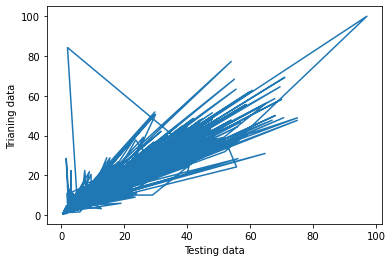

In [37]:
plt.plot(y_test,y_pred)
plt.xlabel("Testing data")
plt.ylabel("Trianing data")
plt.show()

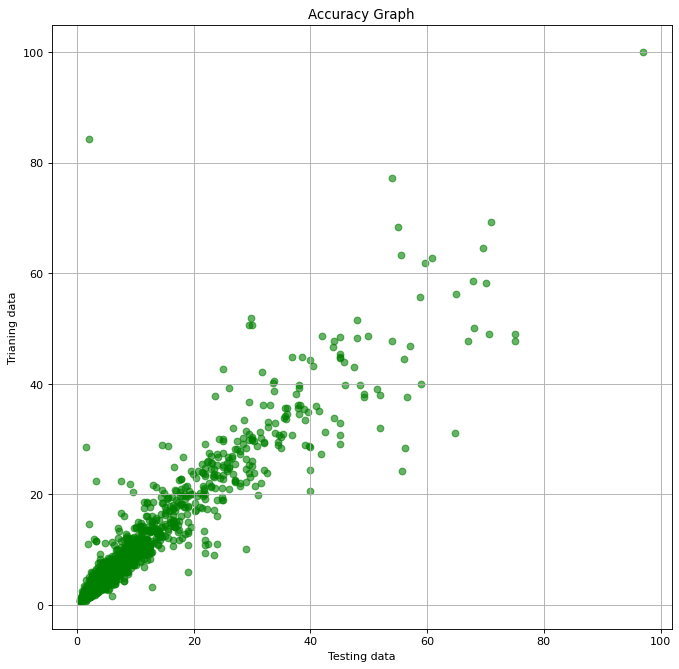

In [38]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
plt.scatter(y_test, y_pred, alpha = 0.6, color = 'green')
plt.title("Accuracy Graph")
plt.xlabel("Testing data")
plt.ylabel("Trianing data")
plt.grid()

 Year  Kilometers_Driven  Mileage   Engine   Power   Seats
  5,   19947kms,          20.36 km, 1197 cc, 78 bhp, 5

In [39]:
x = 4383
dataset.iloc[x:x+1]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4383,4383,Hyundai i10 Sportz,Hyderabad,2016,19947,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,4.5


In [40]:
features_array = np.array([[5, 19947, 20.36, 1197, 78.9 ,5]])
predicted_price = rf.predict(features_array)

In [41]:
predicted_price

array([4.75429167])

1779     7              70963    15.10  2179.0  140.0    7.0
4020     8             115195    25.20  1248.0   74.0    5.0
3248    10              58752    16.47  1198.0   73.9    5.0

In [42]:
x = 1779
dataset.iloc[x:x+1]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1779,1779,Mahindra XUV500 W8 2WD,Kochi,2014,70963,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN,7.83


In [43]:
features_array = np.array([[7, 70963, 15.1, 2179, 140 ,7]])
predicted_price = rf.predict(features_array)

In [44]:
predicted_price

array([8.1367])

In [45]:
model1 = pickle.load(open('model.pkl', 'rb'))
predicted_price2 = model1.predict(features_array)

In [46]:
predicted_price2

array([8.1367])

In [47]:
x = 2795
dataset.iloc[x:x+1]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2795,2795,BMW X5 X5 M,Pune,2015,69002,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,50.0


In [48]:
features_array = np.array([[6, 69002, 15.97, 2993, 258 ,5]])
predicted_price = rf.predict(features_array)
predicted_price

array([47.7558])

In [49]:
2993/258

11.60077519379845

In [50]:
2179/140

15.564285714285715